In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd


Saving Customer_Churn.csv to Customer_Churn.csv


In [2]:
customer_churn = pd.read_csv('Customer_Churn.csv')
customer_5 = customer_churn.iloc[:, 4]
customer_15 = customer_churn.iloc[:, 14]
senior_male_electronic = customer_churn[(customer_churn['gender'] == 'Male') & (customer_churn['SeniorCitizen'] == 1) & (customer_churn['PaymentMethod'] == 'Electronic check')]
customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) | (customer_churn['MonthlyCharges'] > 100)]
two_mail_yes = customer_churn[(customer_churn['Contract'] == 'Two year') & (customer_churn['PaymentMethod'] == 'Mailed check') & (customer_churn['Churn'] == 'Yes')]
customer_333 = customer_churn.sample(n=333)
churn_counts = customer_churn['Churn'].value_counts()

customer_churn.drop(labels=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],inplace=True)
customer_churn[(customer_churn['TotalCharges'] == ' ')]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


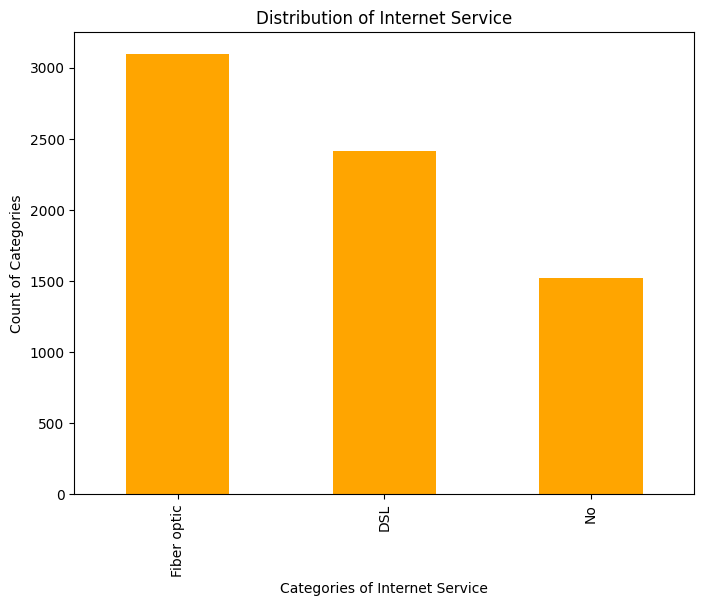

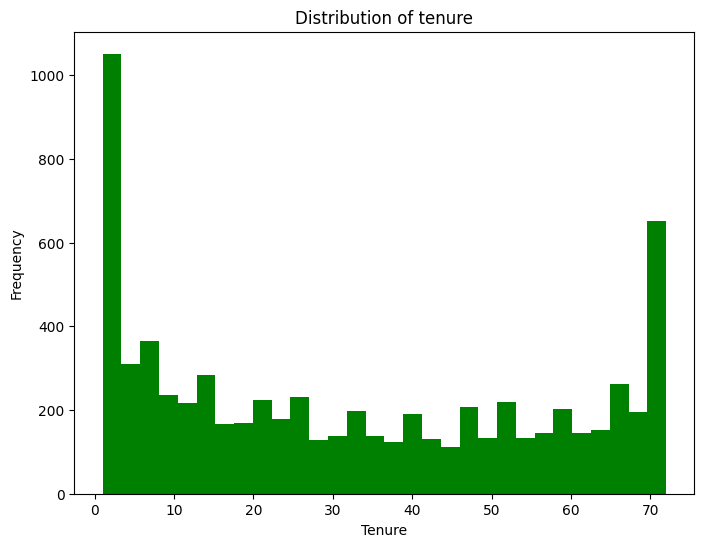

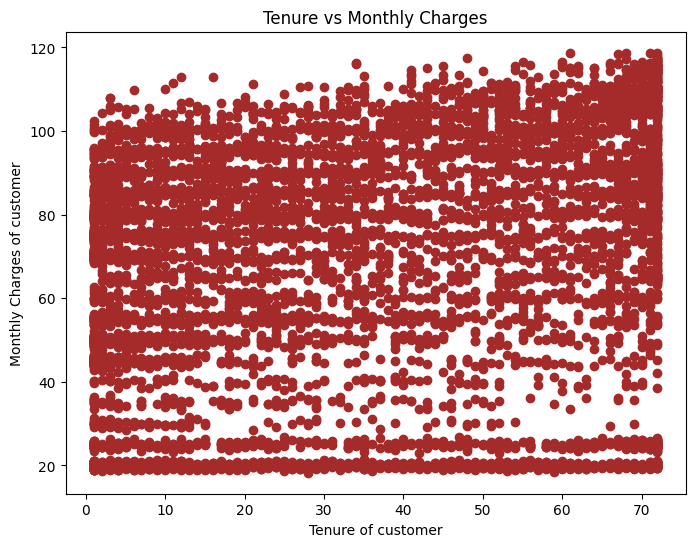

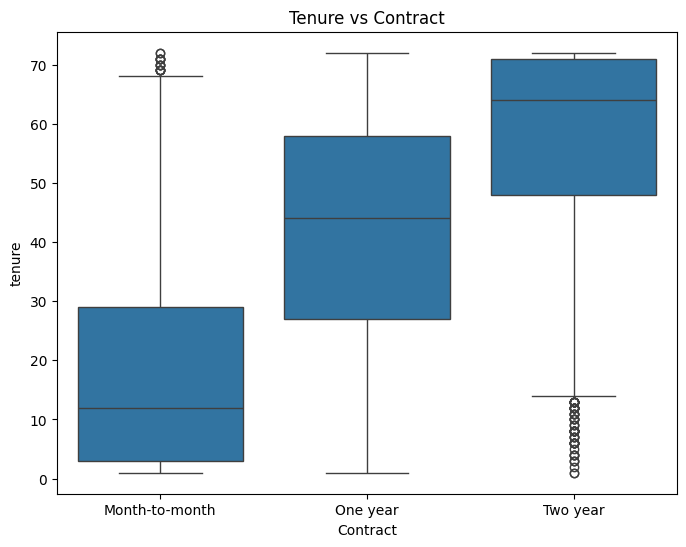

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# a. Bar plot for 'InternetService'
plt.figure(figsize=(8, 6))
customer_churn['InternetService'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

# b. Histogram for 'tenure'
plt.figure(figsize=(8, 6))
plt.hist(customer_churn['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

# c. Scatter plot between 'MonthlyCharges' & 'tenure'
plt.figure(figsize=(8, 6))
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

# d. Box plot between 'tenure' & 'Contract'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contract', y='tenure', data=customer_churn)
plt.title('Tenure vs Contract')
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = customer_churn[['tenure']]  # Independent variable
y = customer_churn['MonthlyCharges']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred  # Prediction error
rmse = mean_squared_error(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
# rmse = 800+

Root Mean Squared Error: 843.5876091200265


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Load the dataset
customer_churn = pd.read_csv('Customer_Churn.csv')

# Select only 'tenure' and 'Contract' as independent variables
X = customer_churn[['tenure', 'Contract']]  # Independent variables
y = customer_churn['MonthlyCharges']  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Preprocessing: OneHotEncoding for 'Contract' and scaling for 'tenure'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['tenure']),  # Scale 'tenure'
        ('cat', OneHotEncoder(drop='first'), ['Contract'])  # OneHotEncode 'Contract'
    ]
)

# Create a pipeline with preprocessing and linear regression
model = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)  # RMSE
print("Root Mean Squared Error:", rmse)

# Cross-validation
cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=10)
print("Cross-validated RMSE:", -cv_scores.mean())



Root Mean Squared Error: 756.411884263089
Cross-validated RMSE: 27.46394956939677


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
customer_churn = pd.read_csv('Customer_Churn.csv')

# Drop rows with missing or invalid data in 'TotalCharges'
customer_churn = customer_churn[customer_churn['TotalCharges'] != ' ']
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)  # Convert to float

# a. Simple Logistic Regression

# 1. Prepare the data
X = customer_churn[['MonthlyCharges']]  # Independent variable
y = customer_churn['Churn']  # Dependent variable

# 2. Split the data (65:35 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# 3. Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Simple Logistic Regression:")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

# b. Multiple Logistic Regression

# 1. Prepare the data
X = customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender']]  # Independent variables
y = customer_churn['Churn']  # Dependent variable

# Preprocessing: Scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges']),  # Scale numeric features
        ('cat', OneHotEncoder(drop='first'), ['gender'])  # One-hot encode 'gender'
    ]
)

# 2. Split the data (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 3. Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nMultiple Logistic Regression:")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Simple Logistic Regression:
Confusion Matrix:
 [[1824    0]
 [ 638    0]]
Accuracy Score: 0.7408610885458976

Multiple Logistic Regression:
Confusion Matrix:
 [[938  95]
 [215 159]]
Accuracy Score: 0.7796730632551528


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Prepare the data
X = customer_churn[['tenure']]  # Independent variable
y = customer_churn['Churn']  # Dependent variable

# 2. Split the data (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# 3. Build and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Model:")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)


Decision Tree Model:
Confusion Matrix:
 [[984  75]
 [255  93]]
Accuracy Score: 0.7654584221748401


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Prepare the data
X = customer_churn[['tenure', 'MonthlyCharges']]  # Independent variables
y = customer_churn['Churn']  # Dependent variable

# 2. Split the data (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 3. Build and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Model:")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

Random Forest Model:
Confusion Matrix:
 [[1321  220]
 [ 305  264]]
Accuracy Score: 0.7511848341232228
